# <div dir=rtl> תרגול שלישי - Pandas </div>


## <div dir=rtl> שאלה 1 </div>
<div dir=rtl>
    בשנת 2017 פרסם משרד הבריאות הברזילאי מידע על אודות תורים לרופא - מידע על המטופלים והאם הם הגיעו למרפאה - במטרה לשפר את שיעור ההתייצבות לתור. המידע שמור בקובץ 3.appointments.csv. <br /><br />
</div>
<div dir=rtl style='background-color: #fcf2f2;'> 
    הערה: הדאטאסט אמיתי וניתן להורדה בצורה חופשייה. הנתונים בו שונו לצורך הדוגמה. <br />
</div>
<div dir=rtl>
    <br />
    א. טענו את הקובץ לאובייקט מסוג DataFrame. כמה רשומות קיימות?
</div>

In [1]:
%ls

3.appointments_3.csv* 3_recitation_3.html*  3_recitation_3.ipynb*


In [2]:
import pandas as pd
dataset = pd.read_csv('3.appointments_3.csv')
dataset.shape

(95317, 14)

In [3]:
dataset.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<div dir=rtl>
    טענו קובץ מסוג CSV. נבדוק מה סוג הנתונים בכל אחת מהעמודות:
</div>

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95317 entries, 0 to 95316
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       95317 non-null  float64
 1   AppointmentID   95317 non-null  int64  
 2   Gender          95317 non-null  object 
 3   ScheduledDay    95317 non-null  object 
 4   AppointmentDay  95317 non-null  object 
 5   Age             95317 non-null  int64  
 6   Neighbourhood   95317 non-null  object 
 7   Scholarship     95317 non-null  int64  
 8   Hipertension    95317 non-null  int64  
 9   Diabetes        95317 non-null  int64  
 10  Alcoholism      95317 non-null  int64  
 11  Handcap         95317 non-null  int64  
 12  SMS_received    95317 non-null  int64  
 13  No-show         95317 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 10.2+ MB


<div dir=rtl>
    כלומר קיבלנו שמידע קטגוריאלי (הגיע לתור או לא) נשמר כטקסט וגם מידע קטגוריאלי אחר (סכרת, יתר לחץ דם) נשמר כאינטג'ר. 
</div>

In [5]:
dataset['PatientId'] = dataset['PatientId'].apply(int)
dataset['Gender'] = dataset['Gender'].astype('category')

bool_fields = ['Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']
dataset[bool_fields] = dataset[bool_fields].astype('bool')

time_fields = ['AppointmentDay','ScheduledDay']
dataset[time_fields] = dataset[time_fields].apply(pd.to_datetime)

dataset.set_index('PatientId', inplace=True)

In [6]:
dataset.head(4)

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,,,,,,,,,,,,,
29872500000000,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,No
558998000000000,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,No
4262960000000,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,No
8841190000000,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,No


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95317 entries, 29872500000000 to 377512000000000
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   AppointmentID   95317 non-null  int64              
 1   Gender          95317 non-null  category           
 2   ScheduledDay    95317 non-null  datetime64[ns, UTC]
 3   AppointmentDay  95317 non-null  datetime64[ns, UTC]
 4   Age             95317 non-null  int64              
 5   Neighbourhood   95317 non-null  object             
 6   Scholarship     95317 non-null  bool               
 7   Hipertension    95317 non-null  bool               
 8   Diabetes        95317 non-null  bool               
 9   Alcoholism      95317 non-null  bool               
 10  Handcap         95317 non-null  bool               
 11  SMS_received    95317 non-null  bool               
 12  No-show         95317 non-null  object             
dtypes: bool(

<div dir=rtl>
    ב. תארו את המשתתפים במחקר מבחינת גיל, מין ואזור מגורים (שכונה)
</div>

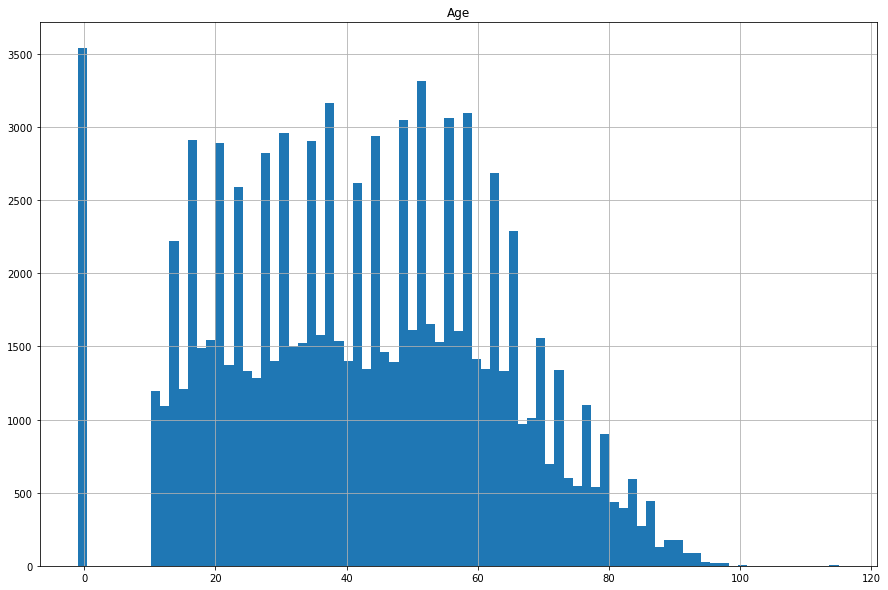

In [8]:
hist = dataset.hist(
    column='Age',
    bins='auto', 
    figsize=(15,10),
)

In [9]:
dataset[['Age']].describe()

,Age
count,95317.000000
mean,42.185948
std,20.715495
min,-1.000000
25%,26.000000
50%,42.000000
75%,58.000000
max,115.000000


In [10]:
dataset['Age'].sort_values().unique()

array([ -1,   0,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,
        22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
        48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 102, 115])

<div dir=rtl>
    שמנו לב שחלק המערכים בעמודת הגיל לא תקינים, לדוגמה גיל שלילי או גיל שווה ל-0. <br />
    חשוב! לא תמיד כדאי לסמוך על כך ש״הדאטה בסדר״, במידה ויש ידע קודם לגביי ערכים אפשריים בעמודה, וודאו זאת
</div>

In [12]:
dataset = dataset[dataset.Age > 0]

In [13]:
dataset[['Age']].describe()

,Age
count,91777.000000
mean,43.813145
std,19.349171
min,11.000000
25%,28.000000
50%,43.000000
75%,58.000000
max,115.000000


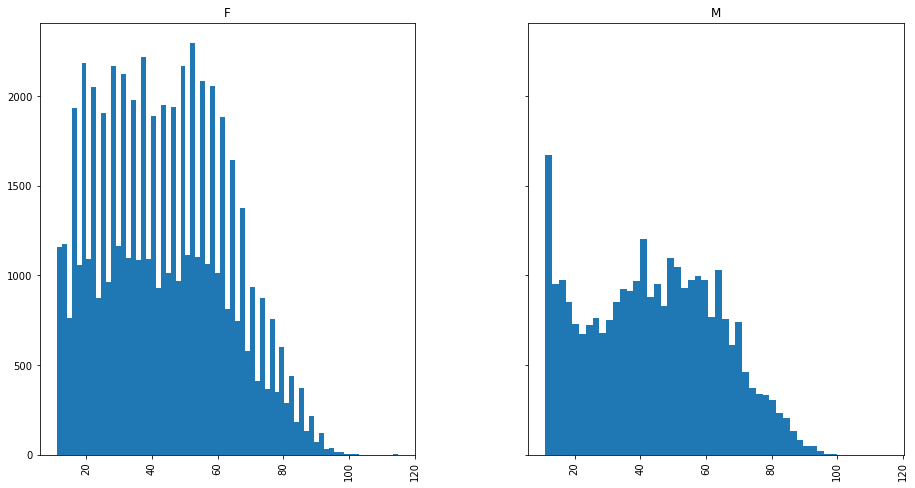

In [16]:
hist_by_gender = dataset.hist(
    column='Age',
    by='Gender',
    bins='auto', 
    figsize=(15,8),
    sharex=True,
    sharey=True
)

In [17]:
dataset['Gender'].value_counts()

F    62975
M    28802
Name: Gender, dtype: int64

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

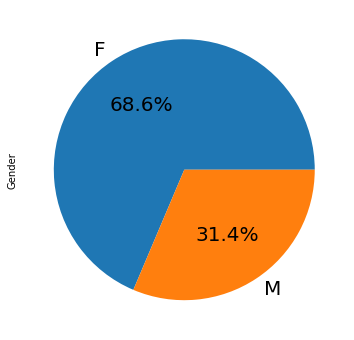

In [18]:
plot = dataset['Gender'].value_counts().plot.pie(
    figsize=(6,6),
    fontsize=20,
    autopct='%.1f%%',
)

<div dir=rtl>
    כעת אנחנו רוצים לספור כמה משתתפים במחקר מכל אזור מגורים. נאיבית - היינו רצים על כל השכונות בלולאה.<br />
    זה בזבוז משאבים - פנדס מממש עבורינו את המתודה groupby בצורה יעילה במיוחד. <br />
    המתודה מחזירה אובייקט אשר מחיל פונקציה על כל קבוצה בנפרד.
</div>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [19]:
neigh_data = pd.DataFrame(
    dataset.groupby('Neighbourhood').size(),
    columns=['# Participants']
)

neigh_data

,# Participants
Neighbourhood,
AEROPORTO,8
ANDORINHAS,1919
ANTÔNIO HONÓRIO,224
ARIOVALDO FAVALESSA,224
BARRO VERMELHO,397
...,...
SÃO JOSÉ,1516
SÃO PEDRO,1984
TABUAZEIRO,2498


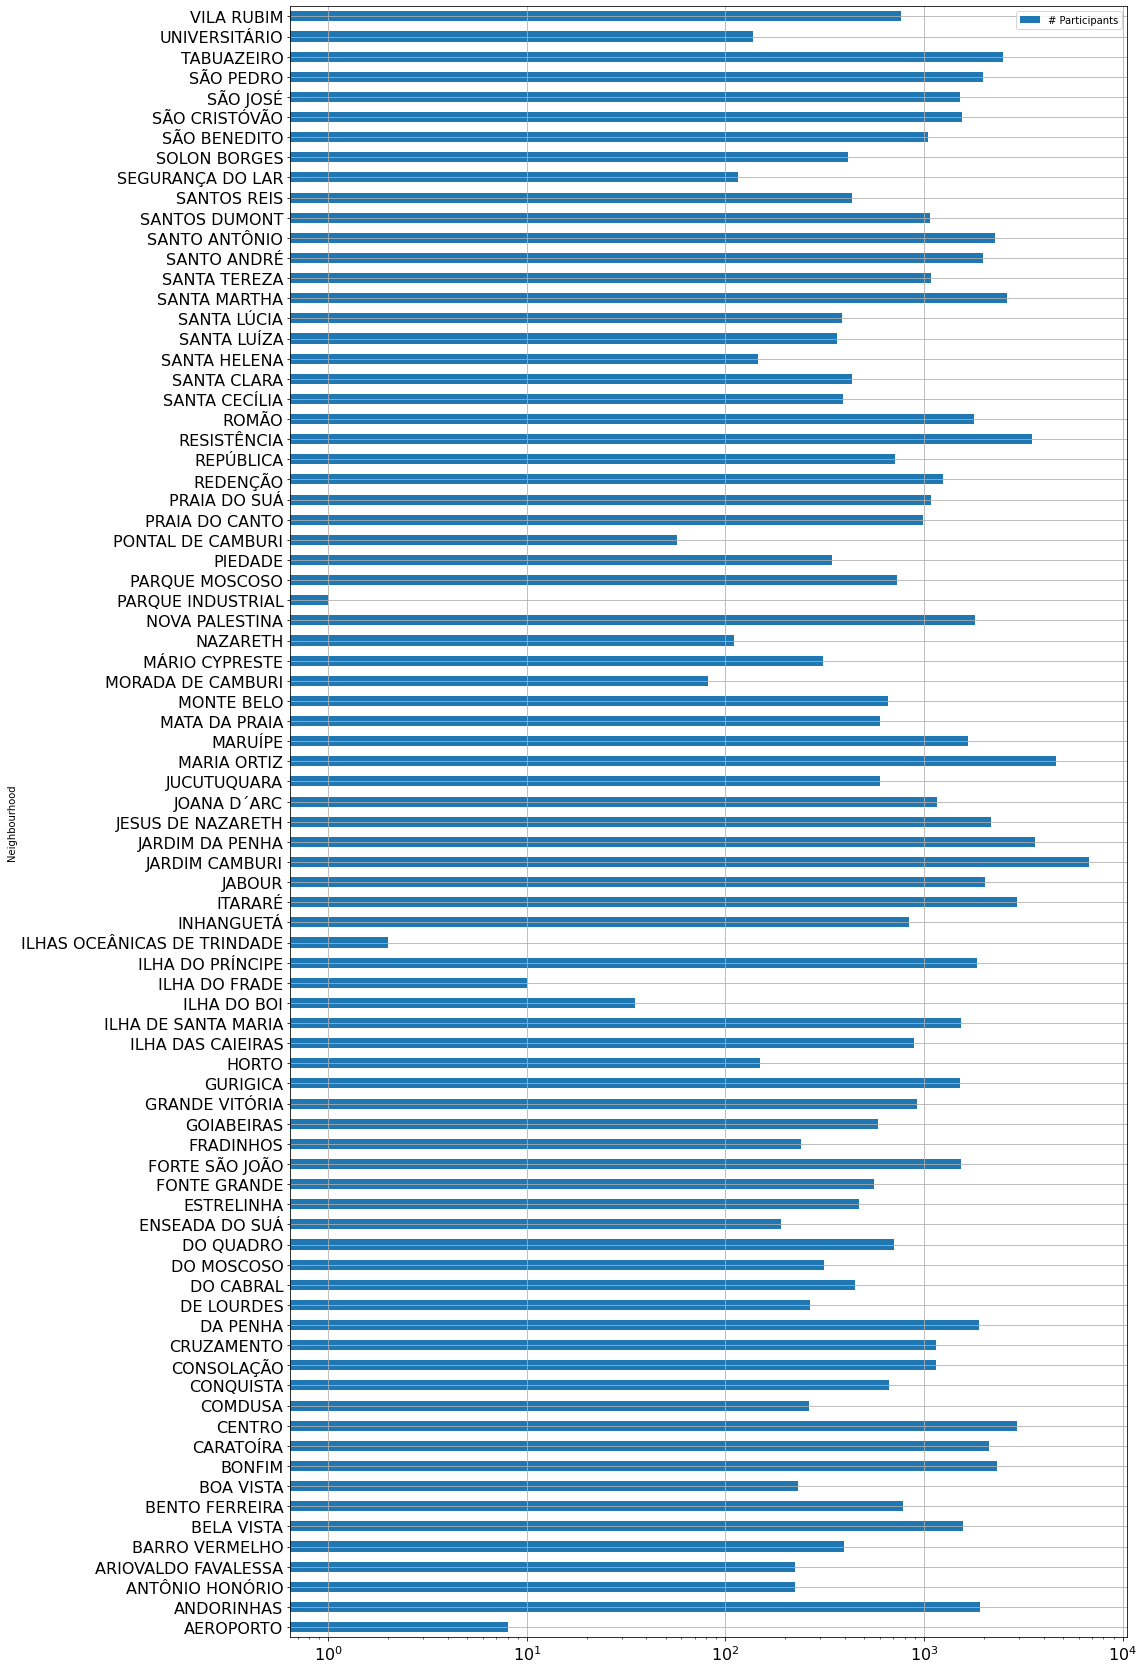

In [20]:
plot = neigh_data.plot(figsize=(15,30),
                       kind='barh',
                       logx=True,
                       fontsize=16,
                       grid=True,
                       rot=0
                      )

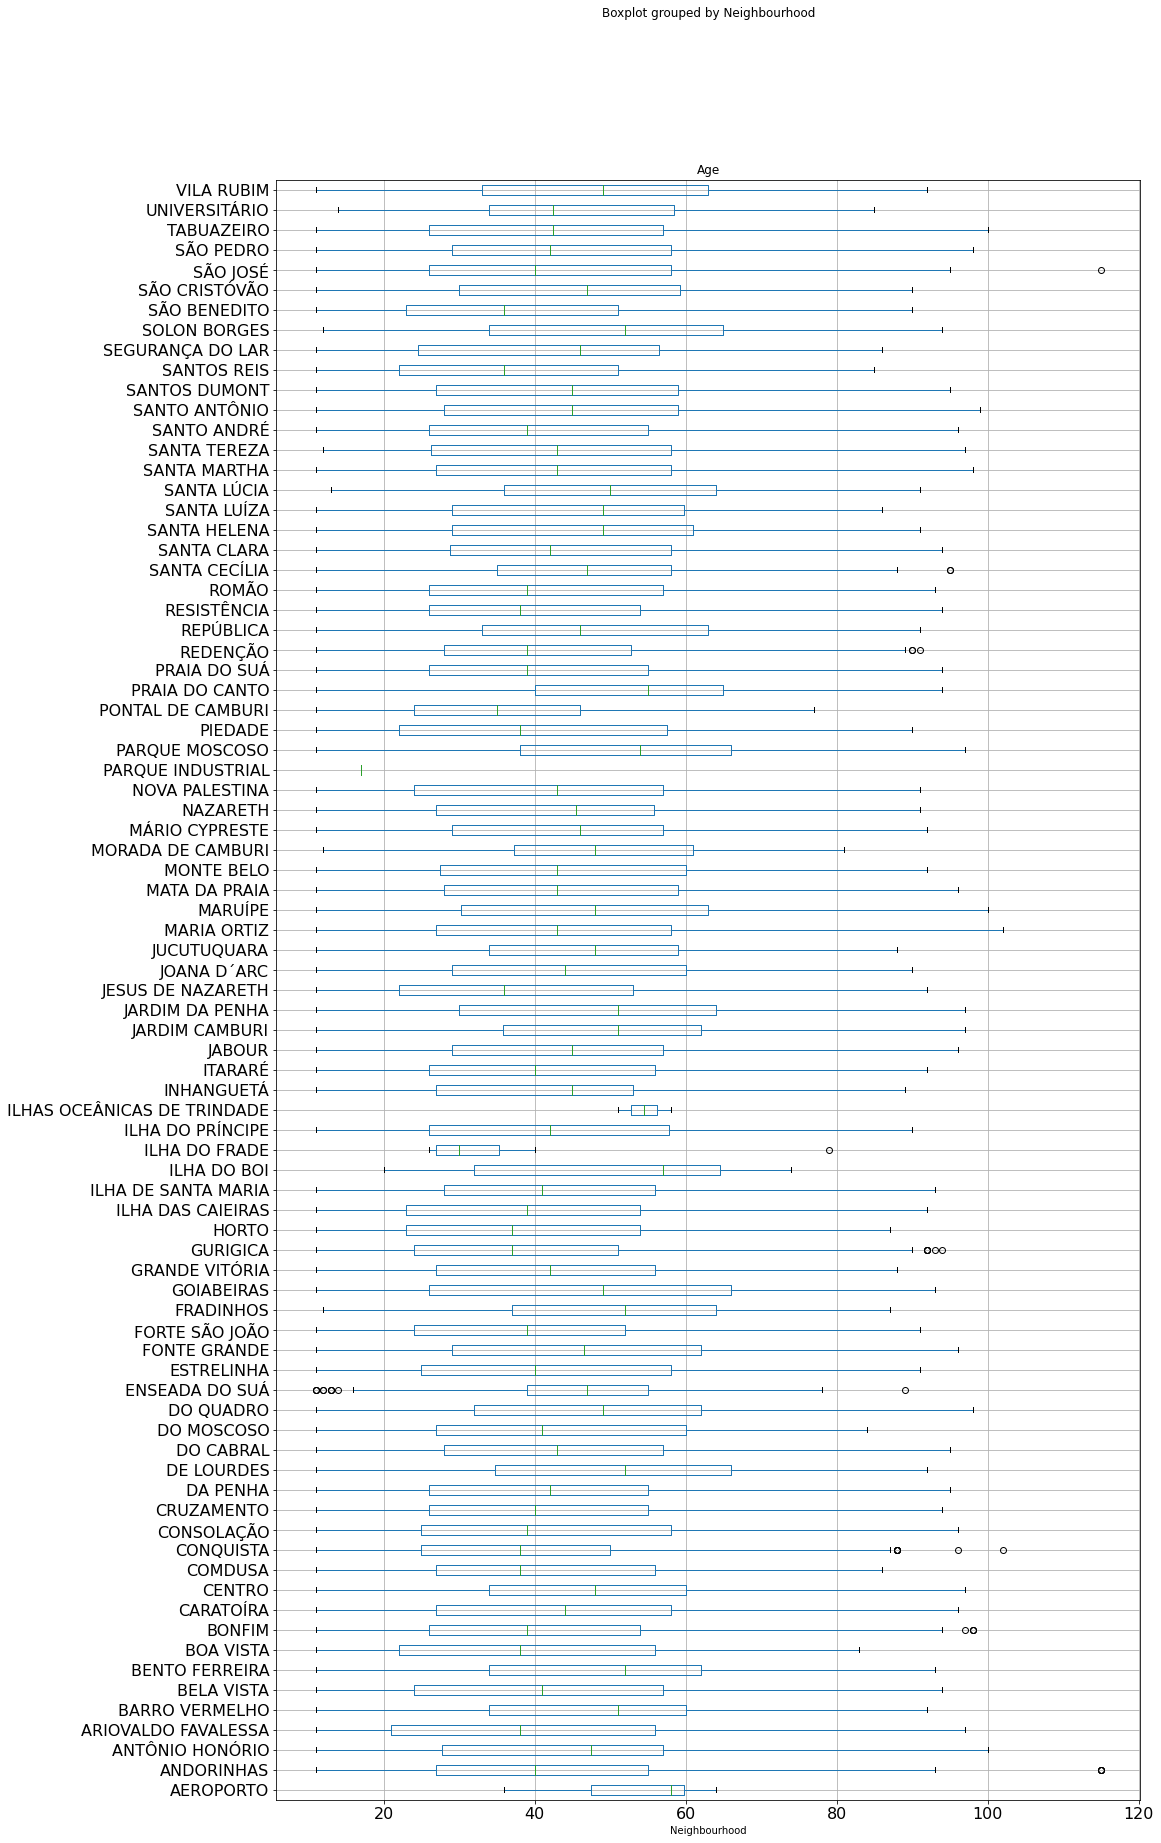

In [21]:
neigh_by_age = dataset.boxplot(
    column='Age',
    by='Neighbourhood',
    vert=False,
    figsize=(15,30),
    fontsize=16
)

In [22]:
dataset[dataset['Neighbourhood']=='PARQUE INDUSTRIAL']

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,,,,,,,,,,,,,
8255990000000,5663947,F,2016-05-05 10:48:59+00:00,2016-05-05 00:00:00+00:00,17,PARQUE INDUSTRIAL,False,False,False,False,False,False,No


<div dir=rtl>
    ג. האם יותר סביר שנשים או גברים לא יתייצבו לתור?<br />
</div>

In [23]:
no_show_by_gender = pd.DataFrame(
    dataset.groupby(['Gender','No-show']).size(),
    columns=['No show?']
)

no_show_by_gender

No show?
Gender No-show          
F      No          50162
       Yes         12813
M      No          23084
       Yes          5718

In [25]:
no_show_by_gender_p = (
    100 * no_show_by_gender / no_show_by_gender.sum(axis='index', level='Gender')
)

no_show_by_gender_p.columns = ['%']

no_show_by_gender_p.round(decimals=2)

%
Gender No-show       
F      No       79.65
       Yes      20.35
M      No       80.15
       Yes      19.85

<div dir=rtl>
    ד. באותה שנה משרד הבריאות הברזילאי ערך ניסוי - הוא שלח הודעות באקראי יום לפני המועד שנקבע לרופא. לצערם,
    הדאטא-סיינטיסטית שלהם פרשה לפנסיה מוקדמת.  עזרו למשרד הבריאות -
    האם משלוח הודעה מגדיל את הסיכויים של המטופל להתייצב? האם זה מובהק?
</div>

In [26]:
texts_sent = pd.DataFrame(
    dataset.groupby(['SMS_received']).size(),
    columns=['#']
)

# another way of creating the '%' column 
texts_sent['%'] = (texts_sent['#'] * 100 / texts_sent['#'].sum()).round(2)

texts_sent

,#,%
SMS_received,,
False,61722,67.25
True,30055,32.75


In [27]:
no_show = pd.DataFrame(
    dataset.groupby(['No-show']).size(),
    columns=['#']
)

no_show['%'] = (no_show['#'] * 100 / no_show['#'].sum()).round(2)

no_show

,#,%
No-show,,
No,73246,79.81
Yes,18531,20.19


In [28]:
x = pd.DataFrame(
    dataset.groupby(['SMS_received', 'No-show']).size(),
    columns=['#']
)
x

#
SMS_received No-show       
False        No       51404
             Yes      10318
True         No       21842
             Yes       8213

In [29]:
x_p = (x / x.sum(axis='index') * 100).round(2)
x_p.columns = ['% observed']
x_p

% observed
SMS_received No-show            
False        No            56.01
             Yes           11.24
True         No            23.80
             Yes            8.95

<div dir=rtl>
    עד עכשיו חישבנו את מה שראינו בדאטה - ה-observed. <br />
    בכדי להבין האם שליחת SMS מעלה את הסיכוי של המטופל להגיע לפגישה נצטרך להשתמש במבחן סטטיסטי. <br />
    המבחן שבו נשתמש הוא מבחן חי-בריבוע, מבחן הבודק אי תלות בין משתנים. <br />
    לשם כך נחשב את האחוזים בכל אופציה בטבלה שהיו מתקבלים אם לא הייתה תלות בין קבלת הודעה והגעה לתור ה- expected.
</div>

In [30]:
x_p['% expected'] = [
    texts_sent['%'].loc[False] * no_show['%'].loc['No'],
    texts_sent['%'].loc[False] * no_show['%'].loc['Yes'],
    texts_sent['%'].loc[True]  * no_show['%'].loc['No'],
    texts_sent['%'].loc[True]  * no_show['%'].loc['Yes']
]

x_p['% expected'] /= 100
x_p['% expected'] = x_p['% expected'].round(2)
x_p

% observed  % expected
SMS_received No-show                        
False        No            56.01       53.67
             Yes           11.24       13.58
True         No            23.80       26.14
             Yes            8.95        6.61

In [ ]:
x_p.sum()

H0: The SMS has no effect on the No-show probability

In [ ]:
from scipy.stats import chisquare

chisq, pv = chisquare(x_p['% observed'], f_exp=x_p['% expected'])
pv

What does this mean?